In [3]:
# Importing libraires
import pandas as pd
import re
import math as mth
import matplotlib.pyplot as plt
import scipy
import seaborn as sns
import numpy as np
import sklearn
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import f_regression
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from mpl_toolkits.mplot3d import Axes3D
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor as vff
from sklearn.preprocessing import StandardScaler as SS
from scipy import stats
from sklearn.cluster import KMeans
stats.chisqprob = lambda chisq,df: stats.chi2.sf(chisq,df)
sns.set()

In [248]:
# Import data and delete unuseful columns

data = pd.read_csv(R"Realstate.csv",header = 1)
df2 = data.drop(data.columns[[0]],axis = 1)
df2 = df2.drop(df2.columns[[9]],axis = 1)

In [249]:
# Creating function to drop non integer values
def dropnotint(num):
    if num != int(num):
        return None
    else:
        return num

In [250]:
# drop non integer columns
d =df2['Age at time of purchase'].dropna()
mask = d.apply(lambda x: str(x).isdigit())
d = d[mask].astype(int)

In [251]:
# Age data of people purchasing 
mean_Age = round(d.mean(),2)
median_Age = d.median()
most_Common_Age = d.mode()
age_Variance = round(d.var(),2)
age_standardDeviation = round(d.std(),2)

In [252]:
df_new = df2[['Age at time of purchase', 'Price']]
df_new["Age at time of purchase"] = pd.to_numeric(df_new['Age at time of purchase'], errors='coerce')
df_new = df_new.dropna()

C:\Users\Amr\AppData\Local\Temp\ipykernel_5076\145143756.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new["Age at time of purchase"] = pd.to_numeric(df_new['Age at time of purchase'], errors='coerce')


In [253]:
# Function to Change values of dollar to integer
def dollarsToInt(word):
    if word != ' ':
        return int(re.sub(r'[^\w]', '', word))
    else:
        return None

In [254]:
# Remove null price values
df_new['Price'] = df_new['Price'].apply(dollarsToInt)
df_new['Price'] = pd.to_numeric(df_new['Price'], errors='coerce')

In [255]:
df_new

,Age at time of purchase,Price
0,19.0,24617268
1,22.0,24633190
2,22.0,20928091
3,22.0,45266701
4,25.0,46708331
...,...,...
173,71.0,20429249
174,73.0,26157989
175,73.0,22286742
176,73.0,29149436


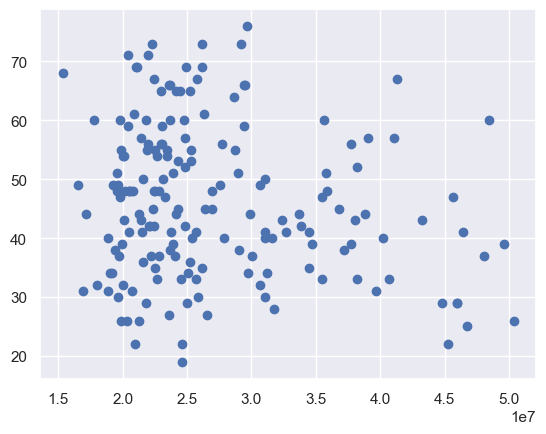

In [256]:
# Plotting how each age spend in buying their homes
plt.scatter(df_new['Price'],df_new['Age at time of purchase'])
plt.show()

In [257]:
# Importing the z-value table
zval = pd.read_csv("zval.csv")

In [258]:
# Creating a Confidence Interval Charachtristics

alpha = 0.05
pop_std = 15000
z = alpha/2
num = 1-z

In [259]:
# Calculating z value by its row and column
b=zval.values.tolist()    
b = sum(b, [])
for i in range(len(b)):
    if num in b:
        filter_data = zval[zval.isin([num]).any(1)]
        zcol = float(filter_data['z'].values[0])
        zrow = float(filter_data.columns[filter_data.isin([num]).any()].values[0])
        corrZ = zcol + zrow
        break
    else:
        num =float(str(num)[:7]) + .001

In [260]:
# Importing dataset and getting their mean and standard error
dataset = pd.read_csv("dataset.csv")
dataset = dataset['Dataset'].apply(dollarsToInt)
samp_mean = round(dataset.mean())
standard_error = round(pop_std / mth.sqrt(len(dataset)))

In [261]:
# Finding the dataset confidence interval range 
rnge = [round(samp_mean-(corrZ*standard_error)),round(samp_mean+(corrZ*standard_error))]
rnge

[94832, 105568]

In [262]:
#Importinh T-Score values dataset
tval = pd.read_csv("ttest.csv")

In [263]:
# Importing a dataset
data = pd.read_csv("ttestdata.csv")

In [264]:
# Values

alpha = 0.05
num = alpha/2
b=tval.values.tolist()    
b = sum(b, [])
n = len(data)

In [265]:
# Getting the t value
res = round(float(tval.iloc[7][str(num)]),2)
res

2.31

In [266]:
# Changing the dollar values to integer
data['Dataset'] = data['Dataset'].apply(dollarsToInt)

In [267]:
# Extract the needed data from the dataset
mean = round(data['Dataset'].mean())
samp_std = round(data['Dataset'].std())
err = round(samp_std / mth.sqrt(len(data)))

In [268]:
# Range of confidence interval with T-test
rnge = [round(mean-(res*standard_error)),round(mean+(res*standard_error))]
rnge

[86206, 98860]

In [269]:
# Importing patients data
pdata = pd.read_csv("patientdata.csv")

In [270]:
# Extract the needed data from the dataset
diff_mean = pdata['Difference'].mean()
diff_std = pdata['Difference'].std()
tvalue = round(float(tval.iloc[8][str(num)]),2)

In [271]:
# Calculating the range of change
ttres = [diff_mean+(tvalue*(diff_std/mth.sqrt(len(pdata)))),diff_mean-(tvalue*(diff_std/mth.sqrt(len(pdata))))]

In [272]:
ttres = [round(x,2) for x in ttres]

In [273]:
# Importing Students Data
coldata = pd.read_csv("coldata.csv",index_col='Unnamed: 0')

In [274]:
coldata

,Engineering,Management,Difference
Size,100,70,?
Sample mean,58,65,-7.00
Population std,10,5,1.16


In [275]:
# Change columns to Series and extract information to find the confidence interval
eng_size = coldata['Engineering'][0]
mgt_size = coldata['Management'][0]
eng_mean = coldata['Engineering'][1]
mgt_mean = coldata['Management'][1]
eng_std = coldata['Engineering'][2]
mgt_std = coldata['Management'][2]
std_err = mth.sqrt((eng_std**2/eng_size)+(mgt_std**2/mgt_size))
conf_interval = [round((eng_mean-mgt_mean)+(1.96*std_err),2),((eng_mean-mgt_mean)-round(1.96*std_err,2))]

In [276]:
conf_interval

[-4.72, -9.28]

In [277]:
# Importing Salaries
dataScSalary = pd.read_csv("datascsalary.csv")

In [278]:
# Change dollar format to integer format
sal = dataScSalary['Dataset'].apply(dollarsToInt)

In [279]:
# Extracting information to find how true is the hypothesis
sal_mean = round(sal.mean())
pop_sal_std = 15000 # Known already
sal_std = round(sal.std())
err = round(pop_sal_std/mth.sqrt(len(sal)))
meu = 113000 # The hypothised mean value

In [280]:
N = round((sal_mean-meu) / err,2)

In [281]:
alpha = 0.05
pop_std = pop_sal_std
z = alpha/2
num = 1-z

In [282]:
b=zval.values.tolist()    
b = sum(b, [])
for i in range(len(b)):
    if num in b:
        filter_data = zval[zval.isin([num]).any(1)]
        zcol = float(filter_data['z'].values[0])
        zrow = float(filter_data.columns[filter_data.isin([num]).any()].values[0])
        corrZ = zcol + zrow
        break
    else:
        num =float(str(num)[:7]) + .001

In [283]:
# Linear Regression Model equation
# y = b0 + b1x1 +err

In [284]:
# Importing data
resdata  = pd.read_csv("satgpa.csv")

In [285]:
# Definig variables
x = resdata['SAT']
y = resdata['GPA']

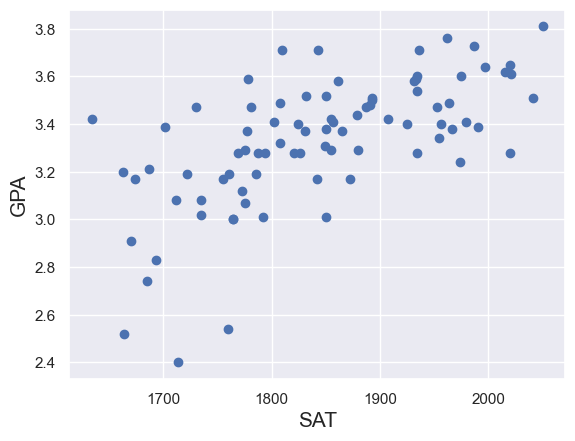

In [286]:
# Plotting variables
plt.scatter(x,y)
plt.xlabel("SAT",fontsize=15)
plt.ylabel("GPA",fontsize=15)
plt.show()

In [287]:
# Calculating coef and constant
X = sm.add_constant(x)
result = sm.OLS(y,x).fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                    GPA   R-squared (uncentered):                   0.996
Model:                            OLS   Adj. R-squared (uncentered):              0.996
Method:                 Least Squares   F-statistic:                          2.120e+04
Date:                Sat, 22 Oct 2022   Prob (F-statistic):                   9.38e-102
Time:                        13:53:39   Log-Likelihood:                          12.440
No. Observations:                  84   AIC:                                     -22.88
Df Residuals:                      83   BIC:                                     -20.45
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
SAT            0.0018   1.24e-05    145.594      0.000       0.002       0.002
==============================================================================
Omnibus:                        9.848   Durbin-Watson:                   1.116
Prob(Omnibus):                  0.007   Jarque-Bera (JB):               11.422
Skew:                          -0.594   Prob(JB):                      0.00331
Kurtosis:                       4.361   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

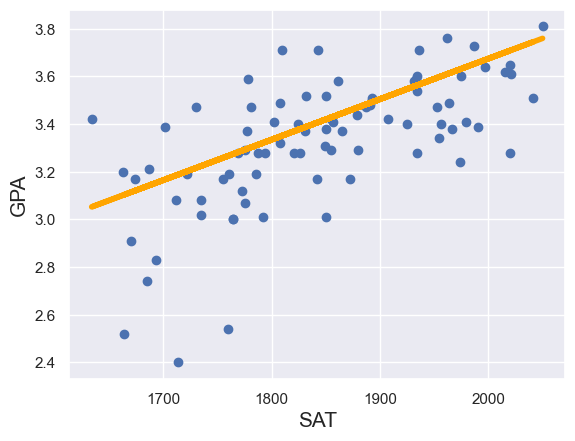

In [288]:
# Plotting with seaborn and regression line
plt.scatter(x,y)
yhat = 0.0017 * x +0.275
fig = plt.plot(x,yhat,lw=4,c='orange',label='Reg line')
plt.xlabel("SAT",fontsize=15)
plt.ylabel("GPA",fontsize=15)
plt.show()

In [289]:
# Multiple Regression Model

In [290]:
data = pd.read_csv("Multiple linear regression.csv")

In [291]:
data

,SAT,GPA,"Rand 1,2,3"
0,1714,2.40,1
1,1664,2.52,3
2,1760,2.54,3
3,1685,2.74,3
4,1693,2.83,2
...,...,...,...
79,1936,3.71,3
80,1810,3.71,1
81,1987,3.73,3
82,1962,3.76,1


In [292]:
x = data[['SAT','Rand 1,2,3']]
y = data['GPA']

In [293]:
result = sm.OLS(y,x).fit()

In [294]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                    GPA   R-squared (uncentered):                   0.996
Model:                            OLS   Adj. R-squared (uncentered):              0.996
Method:                 Least Squares   F-statistic:                          1.048e+04
Date:                Sat, 22 Oct 2022   Prob (F-statistic):                    1.69e-99
Time:                        13:53:40   Log-Likelihood:                          12.459
No. Observations:                  84   AIC:                                     -20.92
Df Residuals:                      82   BIC:                                     -16.06
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
SAT            0.0018   3.22e-05     56.146      0.000       0.002       0.002
Rand 1,2,3    -0.0051      0.027     -0.190      0.850      -0.058       0.048
==============================================================================
Omnibus:                        9.821   Durbin-Watson:                   1.122
Prob(Omnibus):                  0.007   Jarque-Bera (JB):               11.353
Skew:                          -0.594   Prob(JB):                      0.00343
Kurtosis:                       4.353   Cond. No.                     2.15e+03
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 2.15e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [295]:
dum = pd.read_csv('Dummies.csv')

In [296]:
dum

,SAT,GPA,Attendance
0,1714,2.40,No
1,1664,2.52,No
2,1760,2.54,No
3,1685,2.74,No
4,1693,2.83,No
...,...,...,...
79,1936,3.71,Yes
80,1810,3.71,Yes
81,1987,3.73,No
82,1962,3.76,Yes


In [297]:
dumyy = dum.copy()
dumyy

,SAT,GPA,Attendance
0,1714,2.40,No
1,1664,2.52,No
2,1760,2.54,No
3,1685,2.74,No
4,1693,2.83,No
...,...,...,...
79,1936,3.71,Yes
80,1810,3.71,Yes
81,1987,3.73,No
82,1962,3.76,Yes


In [298]:
dumyy['Attendance'] = dumyy['Attendance'].map({"Yes":1,"No":0})

In [299]:
dum.describe()

,SAT,GPA
count,84.000000,84.000000
mean,1845.273810,3.330238
std,104.530661,0.271617
min,1634.000000,2.400000
25%,1772.000000,3.190000
50%,1846.000000,3.380000
75%,1934.000000,3.502500
max,2050.000000,3.810000


In [300]:
## Regression using attendance precentage 
x1 = dumyy[['SAT','Attendance']]
y = dumyy['GPA']

In [301]:
x = sm.add_constant(x1)
res = sm.OLS(y,x.astype(float)).fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    GPA   R-squared:                       0.565
Model:                            OLS   Adj. R-squared:                  0.555
Method:                 Least Squares   F-statistic:                     52.70
Date:                Sat, 22 Oct 2022   Prob (F-statistic):           2.19e-15
Time:                        13:53:40   Log-Likelihood:                 25.798
No. Observations:                  84   AIC:                            -45.60
Df Residuals:                      81   BIC:                            -38.30
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.6439      0.358      1.797      0.076      -0.069       1.357
SAT            0.0014      0.000      7.141      0.000       0.001       0.002
Attendance     0.2226      0.041      5.451      0.000       0.141       0.304
==============================================================================
Omnibus:                       19.560   Durbin-Watson:                   1.009
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               27.189
Skew:                          -1.028   Prob(JB):                     1.25e-06
Kurtosis:                       4.881   Cond. No.                     3.35e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.35e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Text(0.5, 0, 'GPA')

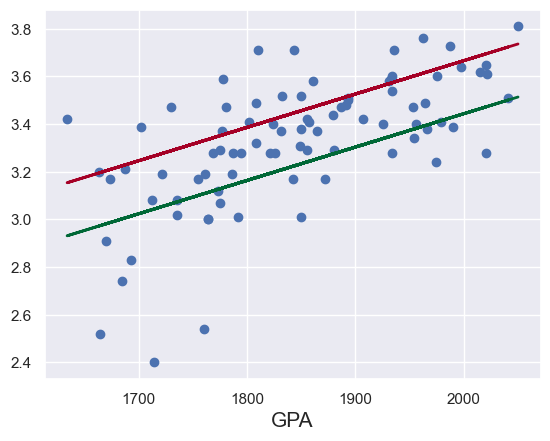

In [302]:
plt.scatter(dum['SAT'],y)
yhat_no = .6439 + .0014 * dum['SAT']
yhat_yes = .8665 + .0014*dum['SAT']
fig = plt.plot(dum['SAT'],yhat_no,lw=2,c='#006837')
fig = plt.plot(dum['SAT'],yhat_yes,lw=2,c='#a50026')
plt.xlabel("SAT",fontsize=15)
plt.xlabel("GPA",fontsize=15)

Text(0.5, 0, 'GPA')

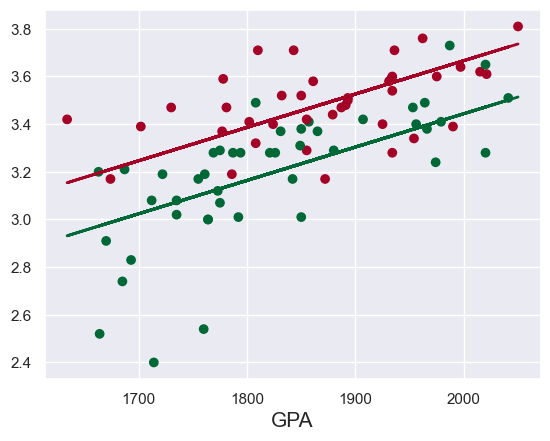

In [303]:
plt.scatter(dumyy['SAT'],y,c=dumyy['Attendance'],cmap='RdYlGn_r')
yhat_no = .6439 + .0014 * dumyy['SAT']
yhat_yes = .8665 + .0014*dumyy['SAT']
fig = plt.plot(dumyy['SAT'],yhat_no,lw=2,c='#006837')
fig = plt.plot(dumyy['SAT'],yhat_yes,lw=2,c='#a50026')
plt.xlabel("SAT",fontsize=15)
plt.xlabel("GPA",fontsize=15)

Text(0.5, 0, 'GPA')

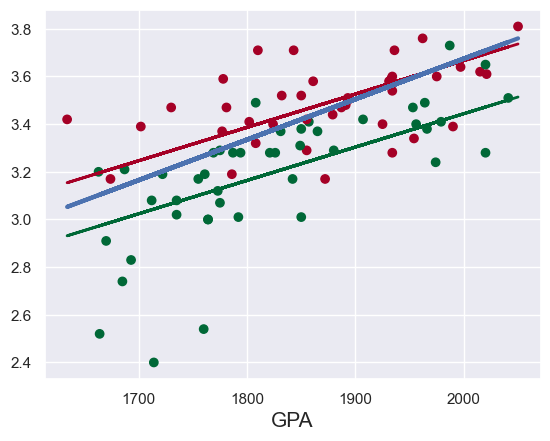

In [304]:
plt.scatter(dumyy['SAT'],y,c=dumyy['Attendance'],cmap='RdYlGn_r')
yhat_no = .6439 + .0014 * dumyy['SAT']
yhat_yes = .8665 + .0014*dumyy['SAT']
fig = plt.plot(dumyy['SAT'],yhat_no,lw=2,c='#006837')
fig = plt.plot(dumyy['SAT'],yhat_yes,lw=2,c='#a50026')
fig = plt.plot(dumyy['SAT'],yhat,lw=3,c='#4C72B0',label='Regression Line')
plt.xlabel("SAT",fontsize=15)
plt.xlabel("GPA",fontsize=15)

In [305]:
x = dumyy.copy()

In [306]:
x['const'] = 1

In [307]:
x = x[['const','SAT','Attendance']]

In [308]:
ndata =  pd.DataFrame({'const':1,'SAT':[1700,1670],'Attendance':[0,1]})
ndata = ndata[['const','SAT','Attendance']]
ndata

,const,SAT,Attendance
0,1,1700,0
1,1,1670,1


In [309]:
ndata.rename(index={0:"Bob",1:'Alice'})

,const,SAT,Attendance
Bob,1,1700,0
Alice,1,1670,1


In [310]:
pred = round(res.predict(ndata),2)

In [311]:
pred[0]

3.02

In [312]:
predDF = pd.DataFrame({"Predictions":pred})
DF = ndata.join(predDF)
DF

,const,SAT,Attendance,Predictions
0,1,1700,0,3.02
1,1,1670,1,3.20


In [313]:
# Sklearn & Machine learning

In [314]:
x = dum['SAT']
y = dum['GPA']

In [315]:
# ML Regression

In [316]:
reg = LinearRegression()

In [317]:
x_matrix = x.values.reshape(-1,1)
x_matrix.shape 
x_matrix

array([[1714],
       [1664],
       [1760],
       [1685],
       [1693],
       [1670],
       [1764],
       [1764],
       [1792],
       [1850],
       [1735],
       [1775],
       [1735],
       [1712],
       [1773],
       [1872],
       [1755],
       [1674],
       [1842],
       [1786],
       [1761],
       [1722],
       [1663],
       [1687],
       [1974],
       [1826],
       [1787],
       [1821],
       [2020],
       [1794],
       [1769],
       [1934],
       [1775],
       [1855],
       [1880],
       [1849],
       [1808],
       [1954],
       [1777],
       [1831],
       [1865],
       [1850],
       [1966],
       [1702],
       [1990],
       [1925],
       [1824],
       [1956],
       [1857],
       [1979],
       [1802],
       [1855],
       [1907],
       [1634],
       [1879],
       [1887],
       [1730],
       [1953],
       [1781],
       [1891],
       [1964],
       [1808],
       [1893],
       [2041],
       [1893],
       [1832],
       [18

In [318]:
reg.fit(x_matrix,y)

LinearRegression()

In [319]:
# R-Squared

In [320]:
reg.score(x_matrix,y)

0.40600391479679765

In [321]:
# Coefficients

In [322]:
reg.coef_

array([0.00165569])

In [323]:
# Intercept

In [324]:
reg.intercept_

0.27504029966028076

In [325]:
# Predictions

In [326]:
reg.predict([[1740]])

array([3.15593751])

In [327]:
ndata = pd.DataFrame(data=[1740,1760],columns=['SAT'])
ndata

,SAT
0,1740
1,1760


In [328]:
ndata['Prediction GPA'] = reg.predict(ndata)
ndata

C:\Users\Amr\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


,SAT,Prediction GPA
0,1740,3.155938
1,1760,3.189051


In [329]:
# Multiple Linear Regression

In [330]:
data = pd.read_csv("Multiple linear regression.csv")

In [331]:
data

,SAT,GPA,"Rand 1,2,3"
0,1714,2.40,1
1,1664,2.52,3
2,1760,2.54,3
3,1685,2.74,3
4,1693,2.83,2
...,...,...,...
79,1936,3.71,3
80,1810,3.71,1
81,1987,3.73,3
82,1962,3.76,1


In [332]:
x = data[['SAT','Rand 1,2,3']]
y = data['GPA']

In [333]:
reg = LinearRegression()
reg.fit(x,y)

LinearRegression()

In [334]:
reg.coef_

array([ 0.00165354, -0.00826982])

In [335]:
reg.intercept_

0.29603261264909486

In [336]:
# Calculating R-Square

In [337]:
r2 = reg.score(x,y)

In [338]:
adjustedR = 1-(1-r2) * (x.shape[0]-1)/(x.shape[0]-1-x.shape[1])

In [339]:
adjustedR

0.3920313482513401

In [340]:
# Feature selection

In [341]:
f_regression(x,y)

(array([56.04804786,  0.17558437]), array([7.19951844e-11, 6.76291372e-01]))

In [342]:
#Finding p-value
p_val = f_regression(x,y)[1]
p_val.round(3)

array([0.   , 0.676])

In [343]:
# Creating Summary table

In [344]:
reg_summary = pd.DataFrame(data=x.columns.values,columns=['Features'])
reg_summary

,Features
0,SAT
1,"Rand 1,2,3"


In [345]:
reg_summary['Coefficients'] =  reg.coef_
reg_summary['p-value'] = p_val.round(3)

In [346]:
reg_summary

,Features,Coefficients,p-value
0,SAT,0.001654,0.000
1,"Rand 1,2,3",-0.008270,0.676


In [347]:
# Standardization

In [348]:
scaler = StandardScaler()

In [349]:
scaler.fit(x)

StandardScaler()

In [350]:
x_scaled = scaler.transform(x)

In [351]:
x_scaled

array([[-1.26338288, -1.24637147],
       [-1.74458431,  1.10632974],
       [-0.82067757,  1.10632974],
       [-1.54247971,  1.10632974],
       [-1.46548748, -0.07002087],
       [-1.68684014, -1.24637147],
       [-0.78218146, -0.07002087],
       [-0.78218146, -1.24637147],
       [-0.51270866, -0.07002087],
       [ 0.04548499,  1.10632974],
       [-1.06127829,  1.10632974],
       [-0.67631715, -0.07002087],
       [-1.06127829, -1.24637147],
       [-1.28263094,  1.10632974],
       [-0.6955652 , -0.07002087],
       [ 0.25721362, -0.07002087],
       [-0.86879772,  1.10632974],
       [-1.64834403, -0.07002087],
       [-0.03150724,  1.10632974],
       [-0.57045283,  1.10632974],
       [-0.81105355,  1.10632974],
       [-1.18639066,  1.10632974],
       [-1.75420834,  1.10632974],
       [-1.52323165, -1.24637147],
       [ 1.23886453, -1.24637147],
       [-0.18549169, -1.24637147],
       [-0.5608288 , -1.24637147],
       [-0.23361183,  1.10632974],
       [ 1.68156984,

In [352]:
reg = LinearRegression()
reg.fit(x_scaled,y)

LinearRegression()

In [353]:
reg.coef_

array([ 0.17181389, -0.00703007])

In [354]:
reg.intercept_

3.330238095238095

In [355]:
reg_summary = pd.DataFrame([['Bias'],['SAT'],['Rand 1,2,3']],columns=['Features'])
reg_summary['Weights'] = reg.intercept_,reg.coef_[0],reg.coef_[1]

In [356]:
reg_summary

,Features,Weights
0,Bias,3.330238
1,SAT,0.171814
2,"Rand 1,2,3",-0.007030


In [357]:
ndata = pd.DataFrame([[1700,2],[1800,1]],columns=['SAT','Rand 1,2,3'])
ndata


,SAT,"Rand 1,2,3"
0,1700,2
1,1800,1


In [358]:
reg.predict(ndata)

C:\Users\Amr\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


array([295.39979563, 312.58821497])

In [359]:
ndata_scaled = scaler.transform(ndata)
ndata_scaled

array([[-1.39811928, -0.07002087],
       [-0.43571643, -1.24637147]])

In [360]:
reg.predict(ndata_scaled).round(2)

array([3.09, 3.26])

In [361]:
# Train and Test model

In [362]:
a = np.arange(1,101)
b = np.arange(501,601)

In [363]:
a_train,a_test = train_test_split(a,test_size=0.2,random_state=42)

In [364]:
a_train

array([ 56,  89,  27,  43,  70,  16,  41,  97,  10,  73,  12,  48,  86,
        29,  94,   6,  67,  66,  36,  17,  50,  35,   8,  96,  28,  20,
        82,  26,  63,  14,  25,   4,  18,  39,   9,  79,   7,  65,  37,
        90,  57, 100,  55,  44,  51,  68,  47,  69,  62,  98,  80,  42,
        59,  49,  99,  58,  76,  33,  95,  60,  64,  85,  38,  30,   2,
        53,  22,   3,  24,  88,  92,  75,  87,  83,  21,  61,  72,  15,
        93,  52])

In [365]:
# Working with data Linear Regression

In [366]:
raw_data = pd.read_csv("carsdata.csv")

In [367]:
raw_data.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
count,4345,4173.000000,4345,4345.000000,4195.000000,4345,4345,4345.000000,4345
unique,7,NaN,6,NaN,NaN,4,2,NaN,312
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN,E-Class
freq,936,NaN,1649,NaN,NaN,2019,3947,NaN,199
mean,NaN,19418.746935,NaN,161.237284,2.790734,NaN,NaN,2006.550058,NaN
std,NaN,25584.242620,NaN,105.705797,5.066437,NaN,NaN,6.719097,NaN
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000,NaN
25%,NaN,6999.000000,NaN,86.000000,1.800000,NaN,NaN,2003.000000,NaN
50%,NaN,11500.000000,NaN,155.000000,2.200000,NaN,NaN,2008.000000,NaN
75%,NaN,21700.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000,NaN


In [368]:
data = raw_data.drop(['Model'],axis=1)

In [369]:
data.isnull().sum()

Brand             0
Price           172
Body              0
Mileage           0
EngineV         150
Engine Type       0
Registration      0
Year              0
dtype: int64

In [370]:
data = data.dropna(axis=0)

In [371]:
data.isnull().sum()

Brand           0
Price           0
Body            0
Mileage         0
EngineV         0
Engine Type     0
Registration    0
Year            0
dtype: int64

C:\Users\Amr\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Price', ylabel='Density'>

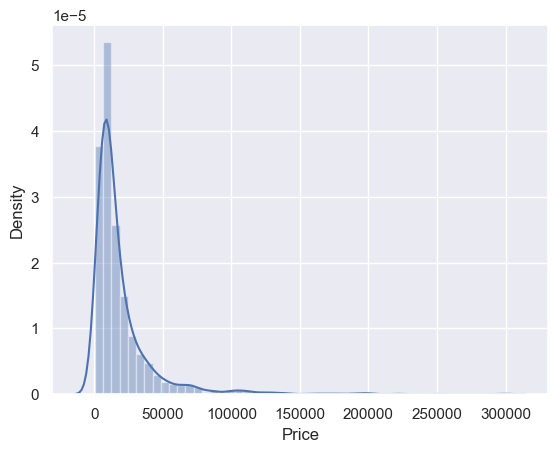

In [372]:
sns.distplot(data['Price'])

In [373]:
q = data['Price'].quantile(0.99)
q2 = data['Price'].quantile(0.01)
data = data[data['Price'] < q]
data = data[data['Price'] > q2]
data.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,3942,3942.000000,3942,3942.000000,3942.000000,3942,3942,3942.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,864,NaN,1510,NaN,NaN,1839,3594,NaN
mean,NaN,18012.919485,NaN,164.648148,2.753166,NaN,NaN,2006.449011
std,NaN,19000.088472,NaN,102.732555,4.981405,NaN,NaN,6.506750
min,NaN,1650.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000
25%,NaN,7000.000000,NaN,92.000000,1.800000,NaN,NaN,2003.000000
50%,NaN,11500.000000,NaN,159.000000,2.200000,NaN,NaN,2007.500000
75%,NaN,21500.000000,NaN,230.000000,3.000000,NaN,NaN,2011.000000


C:\Users\Amr\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Price', ylabel='Density'>

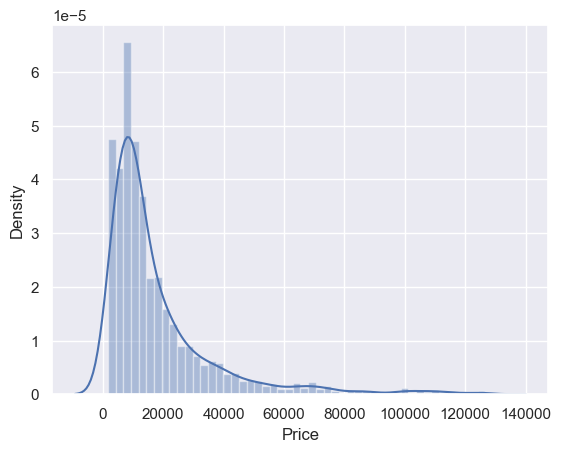

In [374]:
sns.distplot(data['Price'])

C:\Users\Amr\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Mileage', ylabel='Density'>

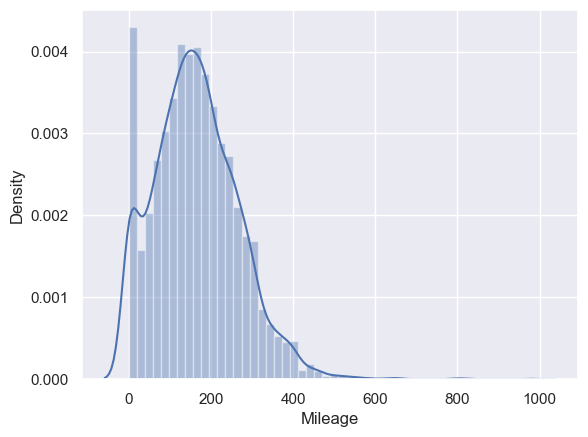

In [375]:
sns.distplot(data['Mileage'])

In [376]:
q = data['Mileage'].quantile(0.99)
q2 = data['Mileage'].quantile(0.01)
data = data[data['Mileage'] < q]
data = data[data['Mileage'] > q2]
data.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,3774,3774.000000,3774,3774.000000,3774.000000,3774,3774,3774.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,825,NaN,1464,NaN,NaN,1720,3429,NaN
mean,NaN,16669.768105,NaN,166.431373,2.769785,NaN,NaN,2006.233174
std,NaN,16481.890730,NaN,92.732363,5.087889,NaN,NaN,6.293822
min,NaN,1650.000000,NaN,1.000000,0.600000,NaN,NaN,1969.000000
25%,NaN,7000.000000,NaN,98.250000,1.800000,NaN,NaN,2003.000000
50%,NaN,11200.000000,NaN,160.000000,2.200000,NaN,NaN,2007.000000
75%,NaN,20300.000000,NaN,230.000000,3.000000,NaN,NaN,2011.000000


C:\Users\Amr\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Mileage', ylabel='Density'>

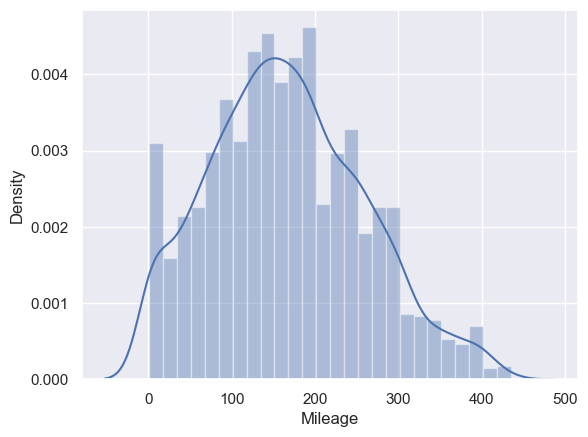

In [377]:
sns.distplot(data['Mileage'])

C:\Users\Amr\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='EngineV', ylabel='Density'>

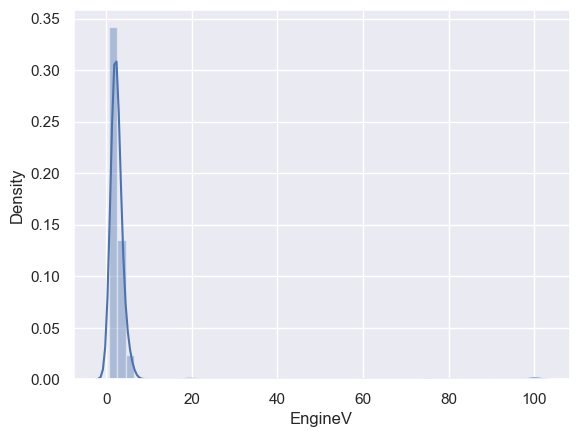

In [378]:
sns.distplot(data['EngineV'])

In [379]:
data =  data[data['EngineV'] < 6.5]

C:\Users\Amr\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='EngineV', ylabel='Density'>

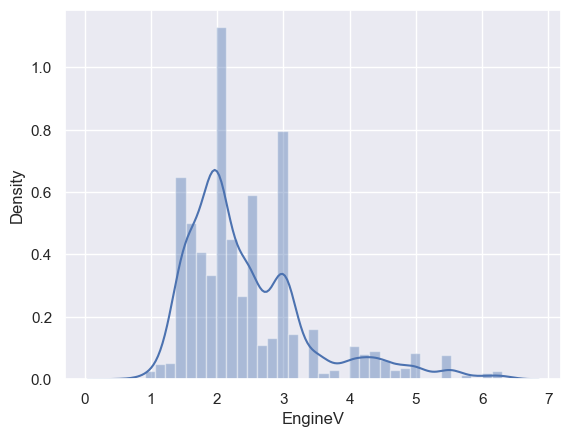

In [380]:
sns.distplot(data['EngineV'])

C:\Users\Amr\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Year', ylabel='Density'>

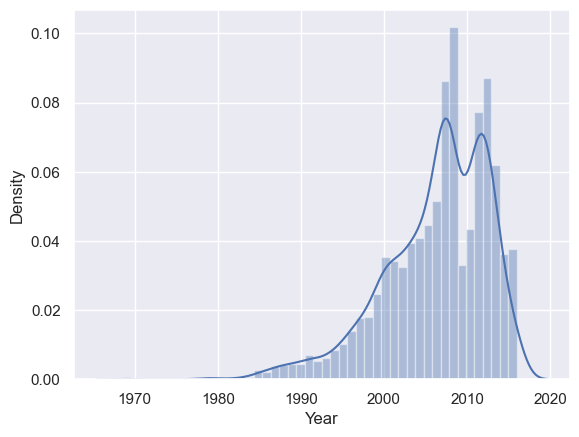

In [381]:
sns.distplot(data['Year'])

In [382]:
q = data['Year'].quantile(0.01)
data = data[data['Year']>q]

C:\Users\Amr\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Year', ylabel='Density'>

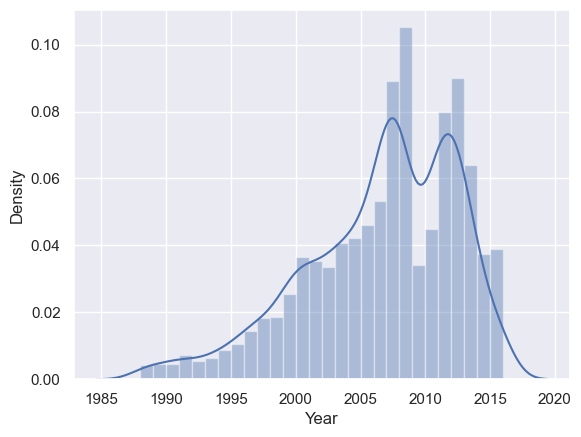

In [383]:
sns.distplot(data['Year'])

In [384]:
clean_data = data.reset_index(drop=True)

In [385]:
clean_data

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011
...,...,...,...,...,...,...,...,...
3703,Volkswagen,11500.0,van,163,2.5,Diesel,yes,2008
3704,Toyota,17900.0,sedan,35,1.6,Petrol,yes,2014
3705,Mercedes-Benz,125000.0,sedan,9,3.0,Diesel,yes,2014
3706,BMW,6500.0,sedan,1,3.5,Petrol,yes,1999


In [386]:
# Scatter plots

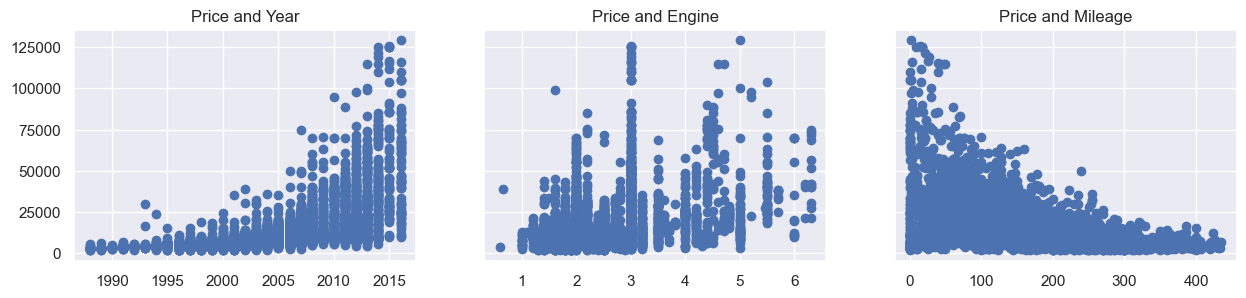

In [387]:
f,(ax1,ax2,ax3) = plt.subplots(1,3,sharey=True,figsize=(15,3))
ax1.scatter(clean_data['Year'],clean_data['Price'])
ax1.set_title("Price and Year")
ax2.scatter(clean_data['EngineV'],clean_data['Price'])
ax2.set_title("Price and Engine")
ax3.scatter(clean_data['Mileage'],clean_data['Price'])
ax3.set_title("Price and Mileage")
plt.show()

In [388]:
log_price = np.log(clean_data['Price'])
clean_data['log_price'] = log_price

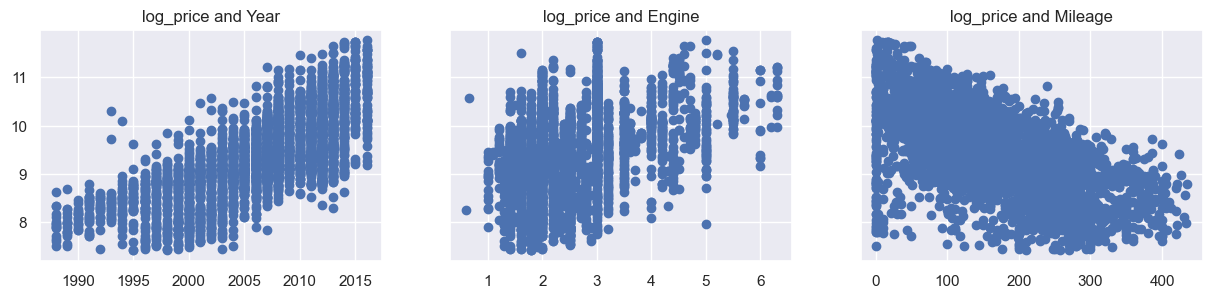

In [389]:
f,(ax1,ax2,ax3) = plt.subplots(1,3,sharey=True,figsize=(15,3))
ax1.scatter(clean_data['Year'],clean_data['log_price'])
ax1.set_title("log_price and Year")
ax2.scatter(clean_data['EngineV'],clean_data['log_price'])
ax2.set_title("log_price and Engine")
ax3.scatter(clean_data['Mileage'],clean_data['log_price'])
ax3.set_title("log_price and Mileage")
plt.show()

In [390]:
clean_data = clean_data.drop(['Price'],axis=1)
clean_data

,Brand,Body,Mileage,EngineV,Engine Type,Registration,Year,log_price
0,BMW,sedan,277,2.0,Petrol,yes,1991,8.342840
1,Mercedes-Benz,van,427,2.9,Diesel,yes,1999,8.974618
2,Mercedes-Benz,sedan,358,5.0,Gas,yes,2003,9.495519
3,Audi,crossover,240,4.2,Petrol,yes,2007,10.043249
4,Toyota,crossover,120,2.0,Petrol,yes,2011,9.814656
...,...,...,...,...,...,...,...,...
3703,Volkswagen,van,163,2.5,Diesel,yes,2008,9.350102
3704,Toyota,sedan,35,1.6,Petrol,yes,2014,9.792556
3705,Mercedes-Benz,sedan,9,3.0,Diesel,yes,2014,11.736069
3706,BMW,sedan,1,3.5,Petrol,yes,1999,8.779557


In [391]:
# Detecting multicollinearity data and removing it
# vif = 1 (No multicollinearity) ---  1<vif<5 (perfect) ---- vif > 10 unacceptable
var = clean_data[['Mileage','Year','EngineV']]
vif = pd.DataFrame()
vif['VIF'] = [vff(var.values,i) for i in range(var.shape[1])]
vif['Features'] = var.columns

In [392]:
vif

,VIF,Features
0,4.182995,Mileage
1,10.685820,Year
2,7.592070,EngineV


In [393]:
clean_data = clean_data.drop(['Year'],axis=1)

In [394]:
clean_data

,Brand,Body,Mileage,EngineV,Engine Type,Registration,log_price
0,BMW,sedan,277,2.0,Petrol,yes,8.342840
1,Mercedes-Benz,van,427,2.9,Diesel,yes,8.974618
2,Mercedes-Benz,sedan,358,5.0,Gas,yes,9.495519
3,Audi,crossover,240,4.2,Petrol,yes,10.043249
4,Toyota,crossover,120,2.0,Petrol,yes,9.814656
...,...,...,...,...,...,...,...
3703,Volkswagen,van,163,2.5,Diesel,yes,9.350102
3704,Toyota,sedan,35,1.6,Petrol,yes,9.792556
3705,Mercedes-Benz,sedan,9,3.0,Diesel,yes,11.736069
3706,BMW,sedan,1,3.5,Petrol,yes,8.779557


In [395]:
# Creating dummy variables

In [396]:
data_dum = pd.get_dummies(clean_data,drop_first=True)

In [397]:
data_dum

,Mileage,EngineV,log_price,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol,Registration_yes
0,277,2.0,8.342840,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1
1,427,2.9,8.974618,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1
2,358,5.0,9.495519,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1
3,240,4.2,10.043249,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
4,120,2.0,9.814656,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3703,163,2.5,9.350102,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1
3704,35,1.6,9.792556,0,0,0,0,1,0,0,0,1,0,0,0,0,1,1
3705,9,3.0,11.736069,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1
3706,1,3.5,8.779557,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1


In [398]:
# Rearange columns

In [399]:
data_dum.columns.values

array(['Mileage', 'EngineV', 'log_price', 'Brand_BMW',
       'Brand_Mercedes-Benz', 'Brand_Mitsubishi', 'Brand_Renault',
       'Brand_Toyota', 'Brand_Volkswagen', 'Body_hatch', 'Body_other',
       'Body_sedan', 'Body_vagon', 'Body_van', 'Engine Type_Gas',
       'Engine Type_Other', 'Engine Type_Petrol', 'Registration_yes'],
      dtype=object)

In [400]:
cols = ['log_price','Price', 'Mileage', 'EngineV', 'Year', 'Brand_BMW',
       'Brand_Mercedes-Benz', 'Brand_Mitsubishi', 'Brand_Renault',
       'Brand_Toyota', 'Brand_Volkswagen', 'Body_hatch', 'Body_other',
       'Body_sedan', 'Body_vagon', 'Body_van', 'Engine Type_Gas',
       'Engine Type_Other', 'Engine Type_Petrol', 'Registration_yes']

In [401]:
data_dum

,Mileage,EngineV,log_price,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol,Registration_yes
0,277,2.0,8.342840,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1
1,427,2.9,8.974618,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1
2,358,5.0,9.495519,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1
3,240,4.2,10.043249,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
4,120,2.0,9.814656,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3703,163,2.5,9.350102,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1
3704,35,1.6,9.792556,0,0,0,0,1,0,0,0,1,0,0,0,0,1,1
3705,9,3.0,11.736069,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1
3706,1,3.5,8.779557,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1


In [402]:
# Declare inputs and targets

In [403]:
target = data_dum['log_price']
inputs = data_dum.drop(['log_price'],axis=1)

In [404]:
#Scale the data

In [405]:
scaler = StandardScaler()
scaler.fit(inputs)

StandardScaler()

In [406]:
# Standardizing inputs
scaled_inputs = scaler.transform(inputs)

In [407]:
# Train-Test split

In [450]:
x_train,x_test,y_train,y_test = train_test_split(scaled_inputs,target,test_size=.2,random_state=435)

In [451]:
# Creating Regression

In [452]:
reg = LinearRegression()
reg.fit(x_train,y_train)

LinearRegression()

In [453]:
y_hat = reg.predict(x_train)

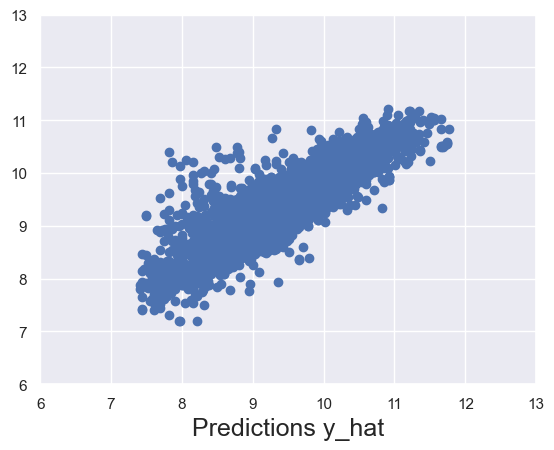

In [454]:
plt.scatter(y_train,y_hat)
plt.xlabel("Targets y-Train",size=18)
plt.xlabel("Predictions y_hat",size=18)
plt.xlim(6,13)
plt.ylim(6,13)
plt.show()

C:\Users\Amr\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Residuals Pdf')

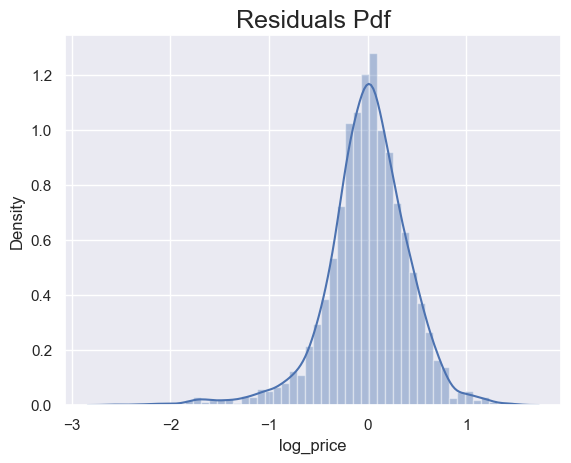

In [455]:
sns.distplot(y_train - y_hat)
plt.title("Residuals Pdf",size=18)

In [456]:
reg.score(x_train,y_train).round(3)

0.735

In [457]:
# Finding weights and bias

In [458]:
reg.intercept_

9.385344871201031

In [459]:
reg.coef_

array([-0.43119346,  0.21771407,  0.01791834,  0.00564247, -0.1284016 ,
       -0.17023793, -0.05307179, -0.06840593, -0.14409391, -0.09698652,
       -0.18956905, -0.11628646, -0.16081831, -0.11391801, -0.02737991,
       -0.13442035,  0.29825861])

In [460]:
reg_sum = pd.DataFrame(inputs.columns.values,columns=['Features'])
reg_sum['Weights'] = reg.coef_.round(3)
reg_sum

,Features,Weights
0,Mileage,-0.431
1,EngineV,0.218
2,Brand_BMW,0.018
3,Brand_Mercedes-Benz,0.006
4,Brand_Mitsubishi,-0.128
5,Brand_Renault,-0.170
6,Brand_Toyota,-0.053
7,Brand_Volkswagen,-0.068
8,Body_hatch,-0.144
9,Body_other,-0.097


In [461]:
# Testing

In [462]:
y_hat_test = reg.predict(x_test)

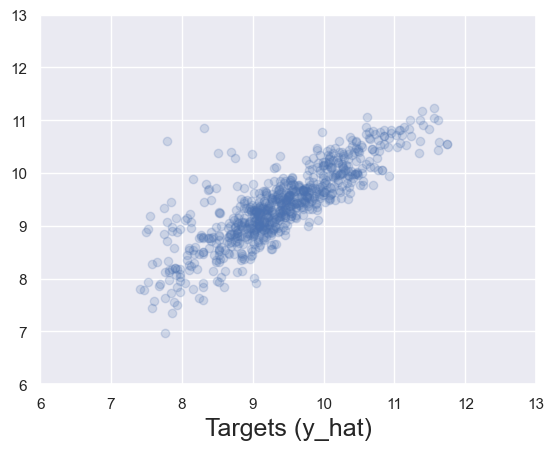

In [463]:
plt.scatter(y_test,y_hat_test,alpha=.2)
plt.xlabel("Targets (Y-train)",size=18)
plt.xlabel("Targets (y_hat)",size=18)
plt.xlim(6,13)
plt.ylim(6,13)
plt.show()

In [464]:
df_pf = pd.DataFrame(np.exp(y_hat_test),columns=['Predictions'])
df_pf.head()

,Predictions
0,14256.932053
1,8858.600794
2,4757.380078
3,10274.491681
4,7931.993067


In [465]:
df_pf['Targets'] = np.exp(y_test)
df_pf

,Predictions,Targets
0,14256.932053,NaN
1,8858.600794,7900.0
2,4757.380078,NaN
3,10274.491681,NaN
4,7931.993067,NaN
...,...,...
737,21472.617237,NaN
738,10362.387074,NaN
739,27328.705587,NaN
740,3592.671708,NaN


In [466]:
y_test = y_test.reset_index(drop=True)

In [471]:
df_pf['Residual'] = abs(df_pf['Targets'] - df_pf['Predictions'])
df_pf

,Predictions,Targets,Residual,Diff
0,14256.932053,NaN,NaN,NaN
1,8858.600794,7900.0,958.600794,12.134187
2,4757.380078,NaN,NaN,NaN
3,10274.491681,NaN,NaN,NaN
4,7931.993067,NaN,NaN,NaN
...,...,...,...,...
737,21472.617237,NaN,NaN,NaN
738,10362.387074,NaN,NaN,NaN
739,27328.705587,NaN,NaN,NaN
740,3592.671708,NaN,NaN,NaN


In [468]:
df_pf['Diff'] = np.absolute(df_pf['Residual']/ df_pf['Targets'] * 100)

In [469]:
df_pf

,Predictions,Targets,Residual,Diff
0,14256.932053,NaN,NaN,NaN
1,8858.600794,7900.0,-958.600794,12.134187
2,4757.380078,NaN,NaN,NaN
3,10274.491681,NaN,NaN,NaN
4,7931.993067,NaN,NaN,NaN
...,...,...,...,...
737,21472.617237,NaN,NaN,NaN
738,10362.387074,NaN,NaN,NaN
739,27328.705587,NaN,NaN,NaN
740,3592.671708,NaN,NaN,NaN


In [472]:
# Model efficiency
df_pf.describe()

,Predictions,Targets,Residual,Diff
count,742.000000,168.000000,168.000000,168.000000
mean,15221.974619,16273.423690,13183.454166,134.790560
std,11535.000830,13287.465729,13013.034423,270.929034
min,1057.083948,1650.000000,8.904816,0.080224
25%,7687.325943,7974.250000,3951.284709,33.944825
50%,11805.694673,11800.000000,8603.871564,62.278692
75%,18298.318796,21050.000000,17358.294481,115.611492
max,75468.030571,85555.000000,61458.176776,2475.428446


In [473]:
# LOGISTIC REGRESSION

In [2]:
raw_data = pd.read_csv("Admittance.csv")

In [3]:
raw_data

,SAT,Admitted
0,1363,No
1,1792,Yes
2,1954,Yes
3,1653,No
4,1593,No
...,...,...
163,1722,Yes
164,1750,Yes
165,1555,No
166,1524,No


In [4]:
data = raw_data.copy()
data['Admitted'] = data['Admitted'].map({"Yes":1,'No':0})
data

,SAT,Admitted
0,1363,0
1,1792,1
2,1954,1
3,1653,0
4,1593,0
...,...,...
163,1722,1
164,1750,1
165,1555,0
166,1524,0


In [5]:
# Creating Variables

In [6]:
y=data['Admitted']
x=data['SAT']

In [7]:
 # Regression

In [8]:
cnst = sm.add_constant(x)
reg_log = sm.Logit(y,cnst)
res_log = reg_log.fit()

Optimization terminated successfully.
         Current function value: 0.137766
         Iterations 10


In [9]:
res_log.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               Admitted   No. Observations:                  168
Model:                          Logit   Df Residuals:                      166
Method:                           MLE   Df Model:                            1
Date:                Sun, 30 Oct 2022   Pseudo R-squ.:                  0.7992
Time:                        02:55:53   Log-Likelihood:                -23.145
converged:                       True   LL-Null:                       -115.26
Covariance Type:            nonrobust   LLR p-value:                 5.805e-42
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        -69.9128     15.737     -4.443      0.000    -100.756     -39.070
SAT            0.0420      0.009      4.454      0.000       0.024       0.060
==============================================================================

Possibly complete quasi-separation: A fraction 0.27 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

In [81]:
# Clustering 

In [82]:
coun = pd.read_csv(R"Country-clusters.csv")

In [83]:
coun

,Country,Latitude,Longitude,Language
0,USA,44.97,-103.77,English
1,Canada,62.40,-96.80,English
2,France,46.75,2.40,French
3,UK,54.01,-2.53,English
4,Germany,51.15,10.40,German
5,Australia,-25.45,133.11,English


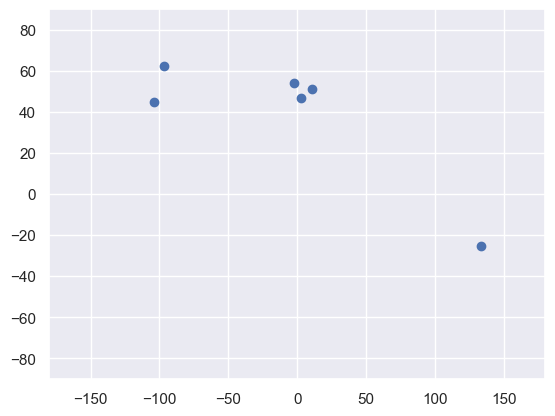

In [84]:
plt.scatter(coun['Longitude'],coun['Latitude'],cmap='rainbow')
plt.xlim(-180,180)
plt.ylim(-90,90)
plt.show()

In [85]:
x = coun.iloc[:,1:3]

In [86]:
x

,Latitude,Longitude
0,44.97,-103.77
1,62.40,-96.80
2,46.75,2.40
3,54.01,-2.53
4,51.15,10.40
5,-25.45,133.11


In [87]:
kmeans = KMeans(2)

In [88]:
kmeans.fit(x)

KMeans(n_clusters=2)

In [89]:
IC = kmeans.fit_predict(x)
IC

array([0, 0, 0, 0, 0, 1])

In [90]:
coun['Cluster'] = IC
coun

,Country,Latitude,Longitude,Language,Cluster
0,USA,44.97,-103.77,English,0
1,Canada,62.40,-96.80,English,0
2,France,46.75,2.40,French,0
3,UK,54.01,-2.53,English,0
4,Germany,51.15,10.40,German,0
5,Australia,-25.45,133.11,English,1


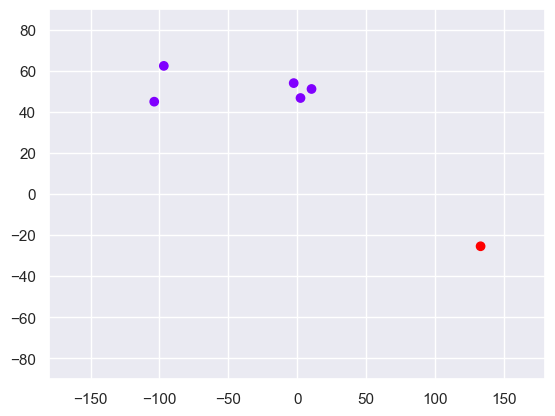

In [91]:
plt.scatter(coun['Longitude'],coun['Latitude'],c=coun['Cluster'],cmap='rainbow')
plt.xlim(-180,180)
plt.ylim(-90,90)
plt.show()

In [92]:
coun_lang = coun.copy()
coun_lang['Language'] = coun_lang['Language'].map({"English":0,"French":1,"German":2})
coun_lang

,Country,Latitude,Longitude,Language,Cluster
0,USA,44.97,-103.77,0,0
1,Canada,62.40,-96.80,0,0
2,France,46.75,2.40,1,0
3,UK,54.01,-2.53,0,0
4,Germany,51.15,10.40,2,0
5,Australia,-25.45,133.11,0,1


In [93]:
x = coun_lang.iloc[:,3:4]
x

,Language
0,0
1,0
2,1
3,0
4,2
5,0


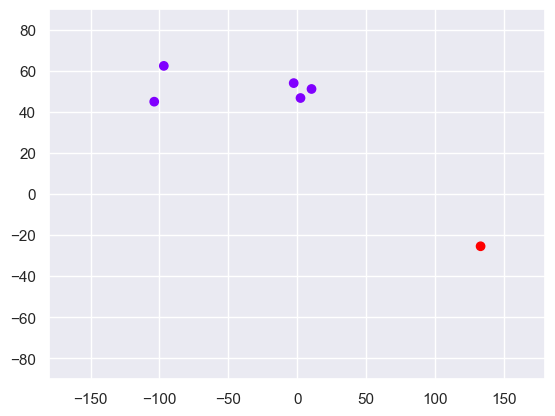

In [94]:
plt.scatter(coun['Longitude'],coun['Latitude'],c=coun['Cluster'],cmap='rainbow')
plt.xlim(-180,180)
plt.ylim(-90,90)
plt.show()

In [95]:
# WCSS

In [96]:
kmeans.inertia_

13205.758119999999

In [79]:
# wcss = []
# for i in range(1,7):
#     kmeans = KMeans(i)
#     kmeans.fit(x)
#     wcss_iter = kmeans.inertia_
#     wcss.append(wcss_iter)

C:\Users\Amr\AppData\Local\Temp\ipykernel_10728\300357034.py:4: ConvergenceWarning: Number of distinct clusters (3) found smaller than n_clusters (4). Possibly due to duplicate points in X.
  kmeans.fit(x)
C:\Users\Amr\AppData\Local\Temp\ipykernel_10728\300357034.py:4: ConvergenceWarning: Number of distinct clusters (3) found smaller than n_clusters (5). Possibly due to duplicate points in X.
  kmeans.fit(x)
C:\Users\Amr\AppData\Local\Temp\ipykernel_10728\300357034.py:4: ConvergenceWarning: Number of distinct clusters (3) found smaller than n_clusters (6). Possibly due to duplicate points in X.
  kmeans.fit(x)


In [97]:
wcss

[3.5, 0.5, 0.0, 0.0, 0.0, 0.0]

In [99]:
# Load the country clusters data
data = pd.read_csv('Country-clusters.csv')
# Check out the data manually 
data

,Country,Latitude,Longitude,Language
0,USA,44.97,-103.77,English
1,Canada,62.40,-96.80,English
2,France,46.75,2.40,French
3,UK,54.01,-2.53,English
4,Germany,51.15,10.40,German
5,Australia,-25.45,133.11,English


In [100]:
# Create an object (which we would call kmeans)
# The number in the brackets is K, or the number of clusters we are aiming for
kmeans = KMeans(3)

In [102]:
# iloc is a method used to 'slice' data 
# 'slice' is not technically correct as there are methods 'slice' which are a bit different
# The term used by pandas is 'selection by position'
# The first argument of identifies the rows we want to keep
# The second - the columns
# When choosing the columns, e.g. a:b, we will keep columns a,a+1,a+2,...,b-1 ; so column b is excluded
x = data.iloc[:,1:3]
# for this particular case, we are choosing columns 1 and 2
# Note column indices in Python start from 0

In [103]:
# Fit the input data, i.e. cluster the data in X in K clusters
kmeans.fit(x)

KMeans(n_clusters=3)

In [104]:
# Create a variable which will contain the predicted clusters for each observation
identified_clusters = kmeans.fit_predict(x)
# Check the result
identified_clusters
# Create a copy of the data
data_with_clusters = data.copy()
# Create a new Series, containing the identified cluster for each observation
data_with_clusters['Cluster'] = identified_clusters
# Check the result
data_with_clusters

,Country,Latitude,Longitude,Language,Cluster
0,USA,44.97,-103.77,English,1
1,Canada,62.40,-96.80,English,1
2,France,46.75,2.40,French,0
3,UK,54.01,-2.53,English,0
4,Germany,51.15,10.40,German,0
5,Australia,-25.45,133.11,English,2


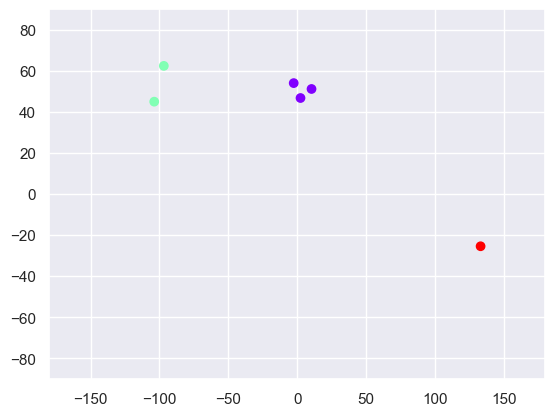

In [105]:
# Plot the data using the longitude and the latitude
# c (color) is an argument which could be coded with a variable 
# The variable in this case has values 0,1,2, indicating to plt.scatter, that there are three colors (0,1,2)
# All points in cluster 0 will be the same colour, all points in cluster 1 - another one, etc.
# cmap is the color map. Rainbow is a nice one, but you can check others here: https://matplotlib.org/users/colormaps.html
plt.scatter(data_with_clusters['Longitude'],data_with_clusters['Latitude'],c=data_with_clusters['Cluster'],cmap='rainbow')
plt.xlim(-180,180)
plt.ylim(-90,90)
plt.show()

In [106]:
data_mapped = data.copy()
data_mapped['Language']=data_mapped['Language'].map({'English':0,'French':1,'German':2})
data_mapped

,Country,Latitude,Longitude,Language
0,USA,44.97,-103.77,0
1,Canada,62.40,-96.80,0
2,France,46.75,2.40,1
3,UK,54.01,-2.53,0
4,Germany,51.15,10.40,2
5,Australia,-25.45,133.11,0


In [107]:
x = data_mapped.iloc[:,1:4]

In [108]:
kmeans = KMeans(2)

In [109]:
kmeans.fit(x)

KMeans(n_clusters=2)

In [110]:
identified_clusters = kmeans.fit_predict(x)
identified_clusters

array([0, 0, 0, 0, 0, 1])

In [111]:
data_with_clusters = data_mapped.copy()
data_with_clusters['Cluster'] = identified_clusters
data_with_clusters

,Country,Latitude,Longitude,Language,Cluster
0,USA,44.97,-103.77,0,0
1,Canada,62.40,-96.80,0,0
2,France,46.75,2.40,1,0
3,UK,54.01,-2.53,0,0
4,Germany,51.15,10.40,2,0
5,Australia,-25.45,133.11,0,1


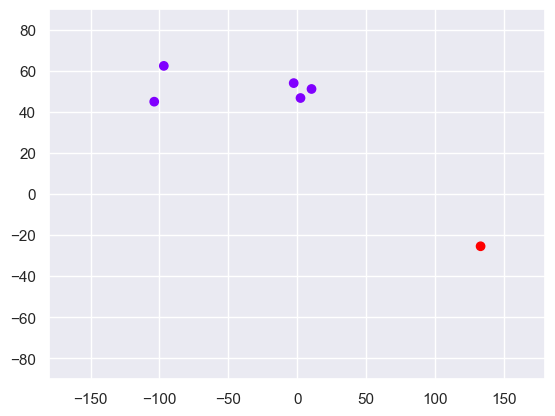

In [112]:
plt.scatter(data_with_clusters['Longitude'],data_with_clusters['Latitude'],c=data_with_clusters['Cluster'],cmap='rainbow')
plt.xlim(-180,180)
plt.ylim(-90,90)
plt.show()

In [113]:
kmeans.inertia_

13208.958119999996

In [114]:
wcss=[]

for i in range(1,7):
    kmeans = KMeans(i)
    kmeans.fit(x)
    wcss_iter = kmeans.inertia_
    wcss.append(wcss_iter)

In [115]:
wcss

[42605.41356666667,
 13208.958119999996,
 290.1052333333333,
 113.91233333333332,
 39.00624999999998,
 0.0]

Text(0, 0.5, 'Within-cluster sum of Squares')

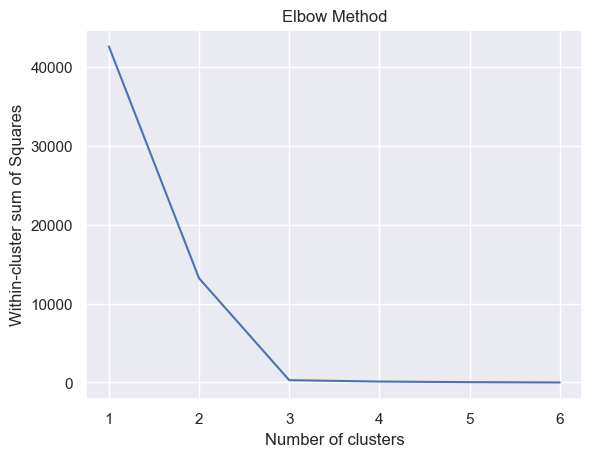

In [116]:
plt.plot([i for i in range(1,7)],wcss)
plt.title("Elbow Method")
plt.xlabel("Number of clusters")
plt.ylabel("Within-cluster sum of Squares")

In [5]:
data = pd.read_csv("loyality.csv")

In [6]:
data

,Satisfaction,Loyalty
0,4,-1.33
1,6,-0.28
2,5,-0.99
3,7,-0.29
4,4,1.06
5,1,-1.66
6,10,-0.97
7,8,-0.32
8,8,1.02
9,8,0.68


Text(0, 0.5, 'Loyalty')

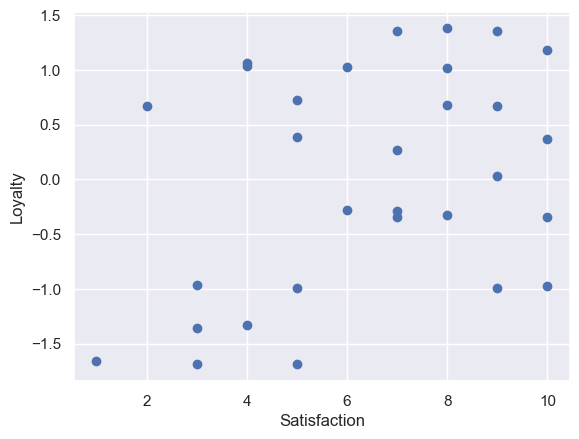

In [8]:
plt.scatter(data['Satisfaction'],data['Loyalty'])
plt.xlabel("Satisfaction")
plt.ylabel("Loyalty")

In [9]:
x = data.copy()

In [11]:
kmeans = KMeans(2)
kmeans.fit(x)

KMeans(n_clusters=2)

In [20]:
clusters = x.copy()
clusters['Cluster_Pred'] = kmeans.fit_predict(x)
clusters

,Satisfaction,Loyalty,Cluster_Pred
0,4,-1.33,0
1,6,-0.28,0
2,5,-0.99,0
3,7,-0.29,1
4,4,1.06,0
5,1,-1.66,0
6,10,-0.97,1
7,8,-0.32,1
8,8,1.02,1
9,8,0.68,1


Text(0, 0.5, 'Loyalty')

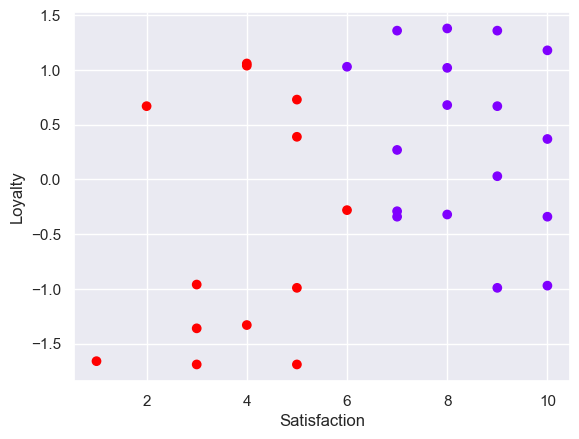

In [19]:
plt.scatter(clusters['Satisfaction'],clusters['Loyalty'],c=clusters['Cluster_Pred'],cmap='rainbow')
plt.xlabel("Satisfaction")
plt.ylabel("Loyalty")

In [24]:
x_scaled = preprocessing.scale(x)
x_scaled

array([[-0.93138063, -1.3318111 ],
       [-0.15523011, -0.28117124],
       [-0.54330537, -0.99160391],
       [ 0.23284516, -0.29117733],
       [-0.93138063,  1.05964534],
       [-2.09560642, -1.6620122 ],
       [ 1.39707095, -0.97159172],
       [ 0.62092042, -0.32119561],
       [ 0.62092042,  1.01962097],
       [ 0.62092042,  0.67941378],
       [ 1.39707095, -0.3412078 ],
       [-0.54330537,  0.38923705],
       [-0.54330537, -1.69203048],
       [-1.70753116,  0.66940768],
       [ 0.23284516,  0.26916393],
       [ 1.00899568,  1.35982816],
       [ 0.62092042,  1.37984035],
       [ 0.23284516,  1.35982816],
       [ 0.23284516, -0.3412078 ],
       [ 1.00899568,  0.66940768],
       [ 1.39707095,  1.17971847],
       [-1.31945589, -1.69203048],
       [-0.93138063,  1.03963316],
       [-1.31945589, -0.96158562],
       [-0.15523011,  1.02962706],
       [ 1.00899568, -0.99160391],
       [ 1.39707095,  0.36922486],
       [ 1.00899568,  0.02901767],
       [-1.31945589,

In [28]:
wcss = []
for i in range(1,10):
    kmeans=KMeans(i)
    kmeans.fit(x_scaled)
    wcss.append(kmeans.inertia_)
wcss

[59.99999999999999,
 29.818973034723143,
 17.913349527387965,
 10.24718180592842,
 7.792695153937187,
 6.634898754940156,
 5.326631124753925,
 4.337110750237059,
 3.8231980448085183]

Text(0.5, 0, 'WCSS')

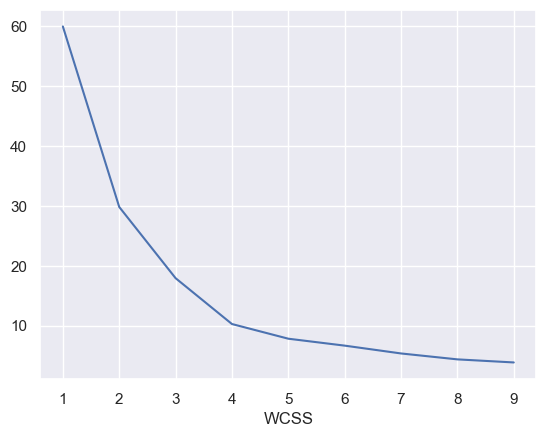

In [29]:
plt.plot(range(1,10),wcss)
plt.xlabel("No.of Clusters")
plt.xlabel("WCSS")

In [30]:
kmeans2 = KMeans(2)
kmeans2.fit(x_scaled)
Nclusters = x.copy()
Nclusters['Clusters_Pred'] = kmeans2.fit_predict(x_scaled)

In [31]:
Nclusters

,Satisfaction,Loyalty,Clusters_Pred
0,4,-1.33,0
1,6,-0.28,1
2,5,-0.99,0
3,7,-0.29,1
4,4,1.06,1
5,1,-1.66,0
6,10,-0.97,1
7,8,-0.32,1
8,8,1.02,1
9,8,0.68,1


Text(0, 0.5, 'Loyalty')

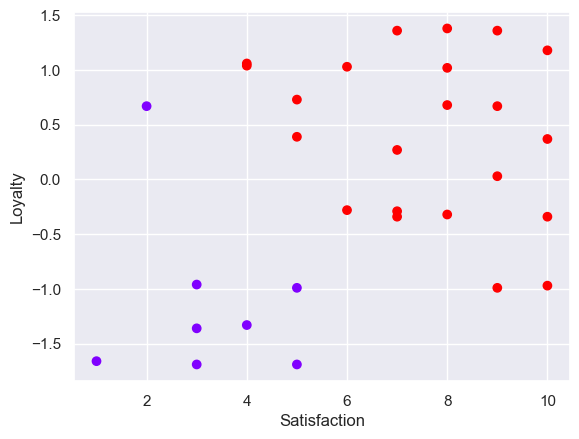

In [32]:
plt.scatter(Nclusters['Satisfaction'],Nclusters['Loyalty'],c=Nclusters['Clusters_Pred'],cmap='rainbow')
plt.xlabel("Satisfaction")
plt.ylabel("Loyalty")

In [37]:
kmeans3 = KMeans(3)# In[ ]:
kmeans3.fit(x_scaled)
Nclusters = x.copy()
Nclusters['Clusters_Pred'] = kmeans3.fit_predict(x_scaled)

Text(0, 0.5, 'Loyalty')

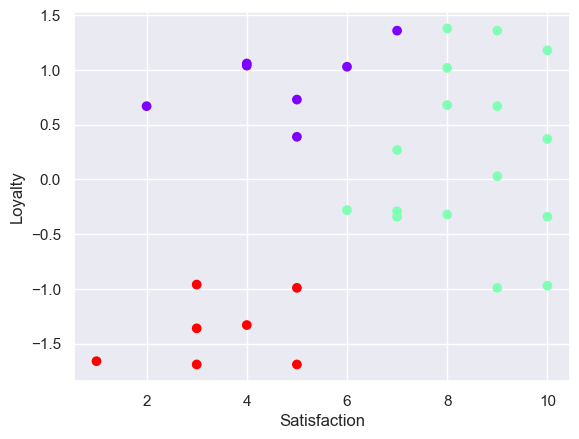

In [38]:
plt.scatter(Nclusters['Satisfaction'],Nclusters['Loyalty'],c=Nclusters['Clusters_Pred'],cmap='rainbow')
plt.xlabel("Satisfaction")
plt.ylabel("Loyalty")

In [43]:
kmeans4 = KMeans(4)# In[ ]:
kmeans4.fit(x_scaled)
Nclusters = x.copy()# In[ ]:
Nclusters['Clusters_Pred'] = kmeans4.fit_predict(x_scaled)

Text(0, 0.5, 'Loyalty')

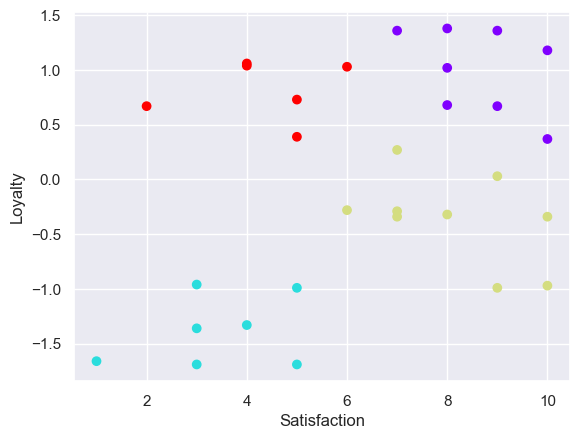

In [44]:
plt.scatter(Nclusters['Satisfaction'],Nclusters['Loyalty'],c=Nclusters['Clusters_Pred'],cmap='rainbow')
plt.xlabel("Satisfaction")
plt.ylabel("Loyalty")

In [45]:
kmeans5 = KMeans(5)# In[ ]:
kmeans5.fit(x_scaled)
Nclusters = x.copy()# In[ ]:
Nclusters['Clusters_Pred'] = kmeans5.fit_predict(x_scaled)

Text(0, 0.5, 'Loyalty')

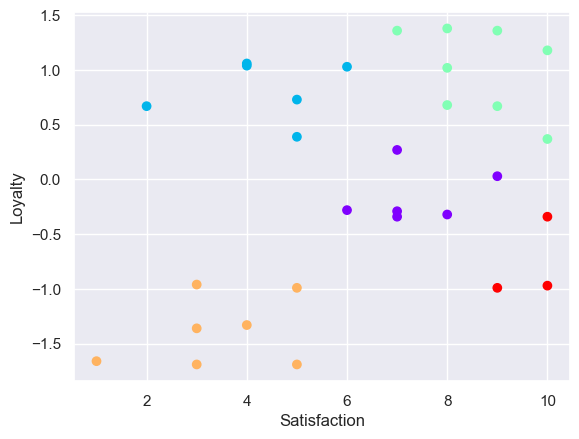

In [46]:
plt.scatter(Nclusters['Satisfaction'],Nclusters['Loyalty'],c=Nclusters['Clusters_Pred'],cmap='rainbow')
plt.xlabel("Satisfaction")
plt.ylabel("Loyalty")

In [2]:
####### NNN #########

In [25]:
obs = 1000
xs  = np.random.uniform(low=10,high=10,size=(obs,1))
zs  = np.random.uniform(low=10,high=10,size=(obs,1))
inputs = np.column_stack((xs,zs))

In [26]:
noise = np.random.uniform(-1,1,(obs,1))
trgt = 2*xs - 3*zs + noise

In [33]:
init_range = .1
w = np.random.uniform(-init_range,init_range,(2,1))
bias = np.random.uniform(-init_range,init_range,1)
w

array([[-0.04696127],
       [ 0.08660898]])

In [28]:
print(w)
print(bias)

[[-0.00077692]
 [-0.06375311]]
[-0.05137972]


In [29]:
eta = .02

In [31]:
for i in range(100):
    outputs = np.dot(inputs,w) + bias
    deltas = outputs-trgt
    loss = np.sum(deltas**2)/2/obs
    print(loss)
    delta_scaled = deltas/obs
    w = w -eta*np.dot(inputs.T,delta_scaled)
    bias = bias - eta * np.sum(delta_scaled)
    

4.352630487301254e+97
3.969773109638084e+98
3.620591866914398e+99
3.302124606300723e+100
3.011669725930546e+101
2.7467632568376575e+102
2.5051579607663402e+103
2.2848042665374577e+104
2.0838328832529047e+105
1.9005389428420058e+106
1.7333675374296617e+107
1.580900528837265e+108
1.441844518320696e+109
1.3150198744891187e+110
1.199350726328984e+111
1.0938558364411078e+112
9.976402770676924e+112
9.098878382968185e+113
8.298541040402688e+114
7.568601370488605e+115
6.902867193940318e+116
6.295690995561187e+117
5.741922015591253e+118
5.2368625550996055e+119
4.7762281247531157e+120
4.356111098899728e+121
3.9729475666404e+122
3.623487098678672e+123
3.30476517347868e+124
3.0140780288196047e+125
2.748959725404606e+126
2.5071612279580846e+127
2.2866313263468953e+128
2.085499234881409e+129
1.9020587221812182e+130
1.7347536369781528e+131
1.582164707069482e+132
1.442997499435609e+133
1.3160714393853185e+134
1.2003097955769872e+135
1.0947305459580401e+136
9.984380471356126e+136
9.106154365095872e+137

In [32]:
print(w)

[[4.64931676e+95]
 [4.64931676e+95]]
